##### 2-Dimensional Strip Packing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
rmax = 10
tmax = 12
tasks = 10

df = pd.DataFrame({
    'ti': np.random.randint(1, tmax, size=tasks),
    'ri': np.random.randint(1, rmax, size=tasks)
})
df.T

,0,1,2,3,4,5,6,7,8,9
ri,4,1,6,2,1,7,5,1,4,8
ti,7,8,8,3,5,2,7,1,6,9


In [3]:
def nfdh(tasks, W):
    df = tasks.sort_values(by='ti', ascending=False)
    df = df.reset_index(drop=True)
    
    level = 0
    time = [[df.ti[0]]]
    rank = [[df.ri[0]]]
    tmax = [df.ti[0]]
        
    for i, y in df[1:].iterrows():
        if W - np.sum(rank[level]) >= y.ri:
            rank[level].append(y.ri)
            time[level].append(y.ti)
        else:
            level += 1
            tmax.append(y.ti + tmax[level - 1])
            time.append([y.ti])
            rank.append([y.ri])
    
    return pd.DataFrame({
        'rank': rank,
        'time': time,
        'tmax': tmax
    }, columns=['rank', 'time', 'tmax'])

table = nfdh(df, W=rmax)
table

,rank,time,tmax
0,"[8, 1]","[9, 8]",9
1,"[6, 4]","[8, 7]",17
2,"[5, 4, 1]","[7, 6, 5]",24
3,"[2, 7, 1]","[3, 2, 1]",27


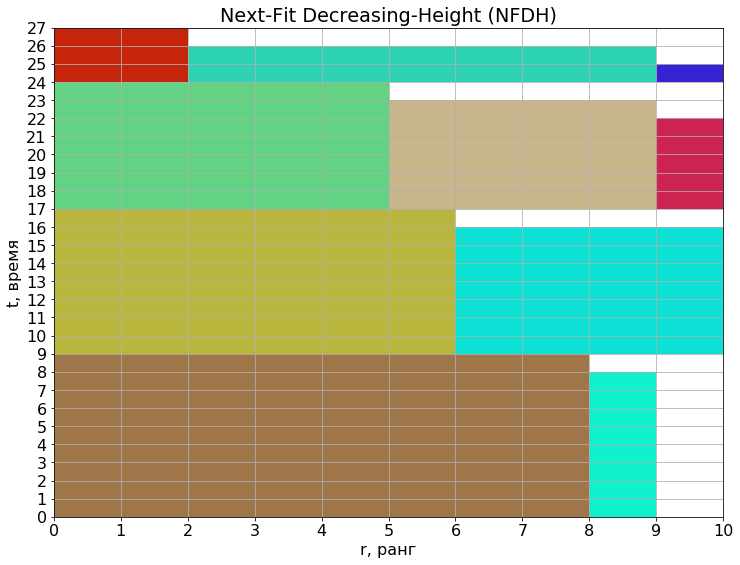

epsilon = 0.12033195020746881


In [4]:
def visualize(table, rmax, title):
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(12, 9))

    ax.grid()
    ax.set(title=title, xlabel='r, ранг', ylabel='t, время')
    
    tmax = np.max(table.tmax)
    plt.xlim([0, rmax])
    plt.ylim([0, tmax])

    plt.xticks(np.arange(0, rmax+1))
    plt.yticks(np.arange(0, tmax+1))

    x, y = 0, 0
    for level, row in table.iterrows():
        for dx, dy in zip(row['rank'], row['time']):
            ax.add_patch(plt.Rectangle((x, y), dx, dy, fc=np.random.rand(3)))
            x += dx
        x, y = 0, row.tmax
    
    plt.show()

# это не надо
# def to_S(table, rmax):
#     x, y = 0, 0
#     t_start = [0] * len(table.at[0, 'rank'])
#     for i, v in enumerate(table.tmax[:-1], start=1):
#         times = len(table.at[i, 'rank'])
#         t_start += times * [table.at[i, 'tmax']]
    
#     proc_time = []
#     for tasks in table['rank']:
#         for t in tasks:
#             proc_time.append(list(np.arange(1, t+1)))
        
#     return { 'ti': t_start, 'xi': proc_time }
    

visualize(table, rmax, 'Next-Fit Decreasing-Height (NFDH)')
inf_t = np.sum(df.ri * df.ti) / rmax
tmax = np.max(table.tmax)
print('epsilon = {}'.format((tmax - inf_t) / inf_t))

In [5]:
def ffdh(tasks, W):
    df = tasks.sort_values(by='ti', ascending=False)
    df = df.reset_index(drop=True)

    level = 0
    time = [[df.ti[0]]]
    rank = [[df.ri[0]]]
    tmax = [df.ti[0]]
    
    for i, y in df[1:].iterrows():
        index = -1
        for i in range(level + 1):
            if W - np.sum(rank[i]) >= y.ri:
                index = i
                break
        
        if index != -1:
            rank[index].append(y.ri)
            time[index].append(y.ti)
        else:
            level += 1
            tmax.append(y.ti + tmax[level - 1])
            time.append([y.ti])
            rank.append([y.ri])
    
    return pd.DataFrame({
        'rank': rank,
        'time': time,
        'tmax': tmax
    }, columns=['rank', 'time', 'tmax'])

table = ffdh(df, W=rmax)
table

,rank,time,tmax
0,"[8, 1, 1]","[9, 8, 5]",9
1,"[6, 4]","[8, 7]",17
2,"[5, 4, 1]","[7, 6, 1]",24
3,"[2, 7]","[3, 2]",27


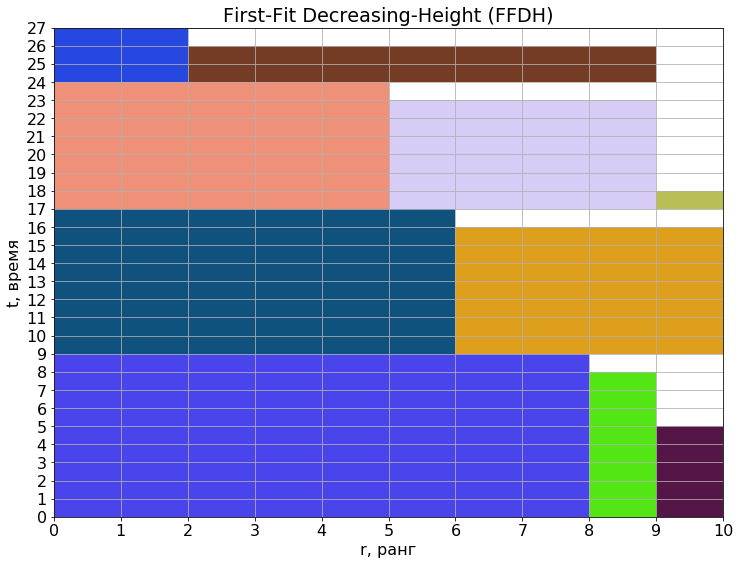

epsilon = 0.12033195020746881


In [6]:
visualize(table, rmax, 'First-Fit Decreasing-Height (FFDH)')
inf_t = np.sum(df.ri * df.ti) / rmax
tmax = np.max(table.tmax)
print('epsilon = {}'.format((tmax - inf_t) / inf_t))

In [15]:
def get_tasks(rmax, tmax, n):
    return pd.DataFrame({
        'ti': np.random.randint(1, tmax, size=n),
        'ri': np.random.randint(1, rmax, size=n)
    })

tmax = 100
n = 1024
m = np.arange(500, 1501, step=500)

get_tasks(n, 100, m[0]).T

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
ri,434,38,539,509,805,292,733,320,998,414,...,1006,605,510,6,994,700,13,536,213,242
ti,60,75,93,33,87,14,16,1,13,88,...,95,93,5,71,81,84,78,72,2,12


![alt text](vs.png)

![alt text](2DSP.png)